## MOVIE PROJECT

## Business Understanding

### A new movie studio is looking to start making movies with a low budget and they want to know what kinds of movies to make. Business goal is to make the most profit on a budget of 10 million dollars.

## Data Understanding

### Data from The Internet Movie Database in database form with multiple related tables and movie cost/revenue data from bom.movie_gross.csv.gz and boxofficemojo are the main sources of analysis.

## Imports

In [1]:
import itertools
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numbers import Number
from scipy import stats
import statsmodels.api as sm
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

## importing moviegross csv

In [2]:
moviegrossdb = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
moviegrossdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Removing null values from foreign gross column

In [3]:
moviegrossdb = moviegrossdb.dropna(subset=['foreign_gross'])

In [4]:
moviegrossdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


### Removing commas from foreign gross column and converting to float type

In [5]:
moviegrossdb['foreign_gross'] = moviegrossdb['foreign_gross'].str.replace(',','')

In [6]:
moviegrossdb['foreign_gross'] = moviegrossdb['foreign_gross'].astype(float)

In [7]:
moviegrossdb['total_gross'] = moviegrossdb['domestic_gross'] + moviegrossdb['foreign_gross']

### Sorted movie gross dataframe by total gross descending order

In [8]:
sorted_moviegrossdb = moviegrossdb.sort_values(by="total_gross", ascending=False)
sorted_moviegrossdb.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


### Reading in IMDB SQL Database

In [9]:
conn = sqlite3.connect('zippedData/im.db/im.db')
df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df[df['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


### Examining contents movie_basics IMDB table

In [10]:
q1 = """
SELECT *
FROM movie_basics
;
"""
pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


### Examining contents of movie_ratings IMDB table

In [11]:
q2 = """
SELECT *
FROM movie_ratings
;
"""
pd.read_sql(q2, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### SQL Query of IMDB getting title, average rating, genre number of votes for movies with over 5000 votes (popular)

In [12]:
q11 = """
SELECT mb.primary_title, mr.averagerating, mr.numvotes, mb.genres
FROM movie_basics as mb
JOIN movie_ratings as mr
ON mb.movie_id = mr.movie_id
WHERE numvotes > 5000
ORDER BY numvotes DESC
;
"""
pd.read_sql(q11, conn)

,primary_title,averagerating,numvotes,genres
0,Inception,8.8,1841066,"Action,Adventure,Sci-Fi"
1,The Dark Knight Rises,8.4,1387769,"Action,Thriller"
2,Interstellar,8.6,1299334,"Adventure,Drama,Sci-Fi"
3,Django Unchained,8.4,1211405,"Drama,Western"
4,The Avengers,8.1,1183655,"Action,Adventure,Sci-Fi"
...,...,...,...,...
3916,Another Me,4.7,5008,"Mystery,Thriller"
3917,Officer Down,5.5,5002,"Crime,Drama"
3918,Cub,5.9,5002,"Adventure,Horror"
3919,211,4.4,5001,"Action,Crime,Drama"


Converting this query into a pandas dataframe so we can merge with sorted_moviegrossdb dataframe

In [13]:
popularimdb_df = pd.read_sql(q11, conn)

In [14]:
popularimdb_df.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  3921 non-null   object 
 1   averagerating  3921 non-null   float64
 2   numvotes       3921 non-null   int64  
 3   genres         3921 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 122.7+ KB


### Merging sorted_moviegrossdb and popularimdb_df

In [15]:
mergeddf = sorted_moviegrossdb.merge(popularimdb_df, how='inner', left_on='title', right_on='primary_title')

In [16]:
imdbandgross = mergeddf.drop_duplicates(subset=['title']).copy()

In [17]:
imdbandgross.drop(columns=['primary_title'], inplace=True)

In [18]:
imdbandgross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1375
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1362 non-null   object 
 1   studio          1361 non-null   object 
 2   domestic_gross  1351 non-null   float64
 3   foreign_gross   1362 non-null   float64
 4   year            1362 non-null   int64  
 5   total_gross     1351 non-null   float64
 6   averagerating   1362 non-null   float64
 7   numvotes        1362 non-null   int64  
 8   genres          1362 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 106.4+ KB


In [19]:
imdbandgross.drop(columns=['domestic_gross'], inplace=True)

In [20]:
imdbandgross.drop(columns=['foreign_gross'], inplace=True)

In [21]:
imdbandgross.head()

,title,studio,year,total_gross,averagerating,numvotes,genres
0,Avengers: Age of Ultron,BV,2015,1.405400e+09,7.3,665594,"Action,Adventure,Sci-Fi"
1,Black Panther,BV,2018,1.347000e+09,7.3,516148,"Action,Adventure,Sci-Fi"
2,Star Wars: The Last Jedi,BV,2017,1.332600e+09,7.1,462903,"Action,Adventure,Fantasy"
3,Jurassic World: Fallen Kingdom,Uni.,2018,1.309500e+09,6.2,219125,"Action,Adventure,Sci-Fi"
4,Frozen,BV,2013,1.276400e+09,7.5,516998,"Adventure,Animation,Comedy"


### Making exploratory graphs to try and understand the data further

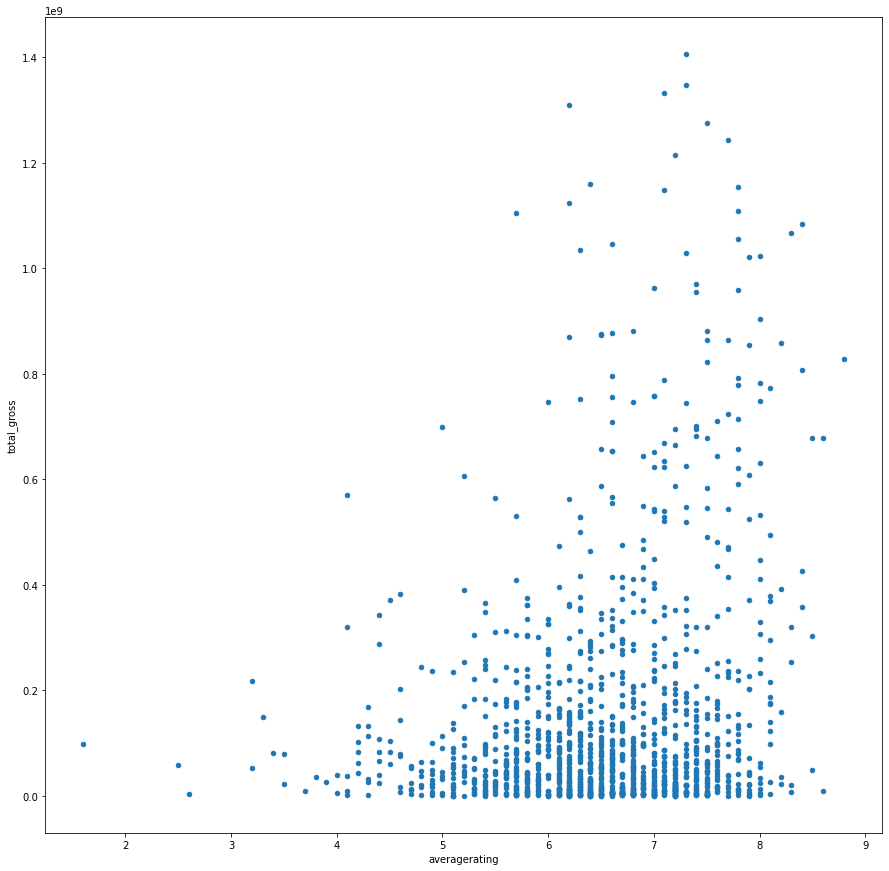

In [22]:
### Scatter plot of popular movies comparing average rating and total gross
imdbandgross.plot.scatter(
x='averagerating',
y='total_gross',
figsize=(15,15));

### Reading in moviebudgets csv file

In [23]:
moviebudgets = pd.read_csv("zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv")
moviebudgets.head()
moviebudgets["profit"] = 0
moviebudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",0


### Cleaning moviebudgets CSV file and filling out profit column as worldwide_gross - production_budget

In [24]:
moviebudgets = pd.read_csv("zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv")
#moviebudgets["profit"] = 0
# Assuming 'worldwide_gross' and 'production_budget' are columns in your DataFrame
moviebudgets['worldwide_gross'] = moviebudgets['worldwide_gross'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).apply(Decimal)
moviebudgets['production_budget'] = moviebudgets['production_budget'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).apply(Decimal)
moviebudgets['Profit'] = moviebudgets['worldwide_gross'] - moviebudgets['production_budget']
moviebudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


In [25]:
moviebudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   Profit             5782 non-null   object
dtypes: int64(1), object(6)
memory usage: 316.3+ KB


### Converting budget and gross columns to floats

In [26]:
moviebudgets['production_budget'] = moviebudgets['production_budget'].astype(float)
moviebudgets['Profit'] = moviebudgets['Profit'].astype(float)
moviebudgets['worldwide_gross'] = moviebudgets['worldwide_gross'].astype(float)

In [27]:
moviebudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
 6   Profit             5782 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 316.3+ KB


### Basic plot of production budget vs profit based off of moviebudgets dataframe

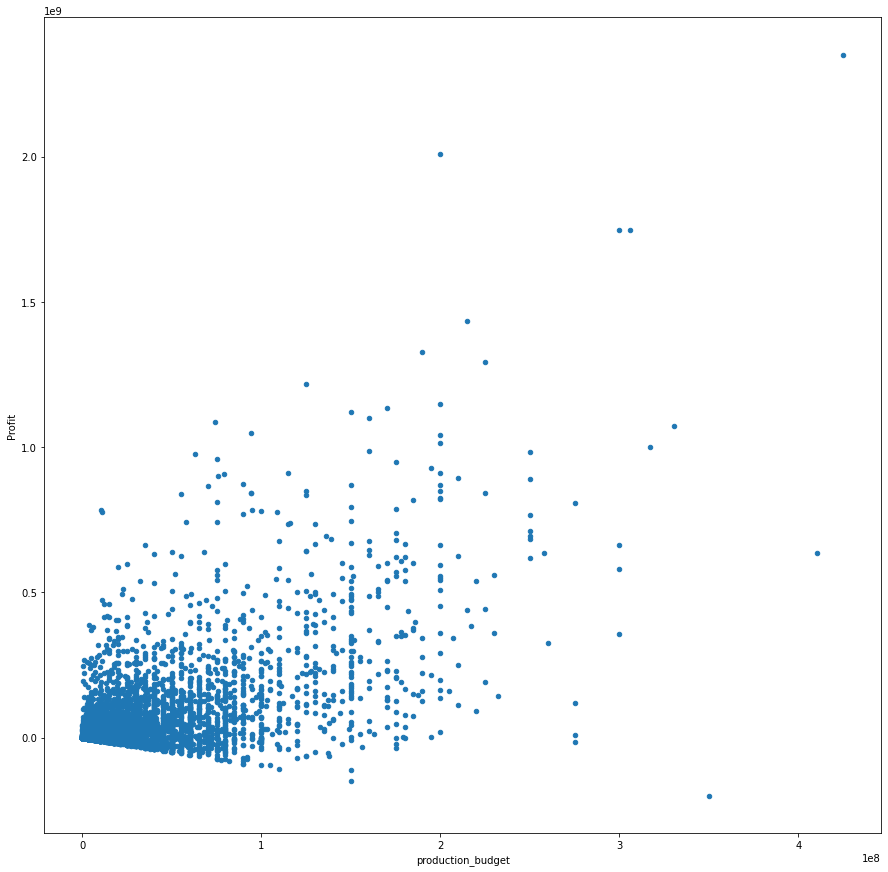

In [29]:
moviebudgets.plot.scatter(
x='production_budget',
y='Profit',
figsize=(15,15));

### IMDB SQL query that will combine with moviebudgets database

In [30]:
q12 = """
SELECT mb.primary_title, mr.averagerating, mr.numvotes, mb.genres
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
;
"""
pd.read_sql(q12, conn)

,primary_title,averagerating,numvotes,genres
0,Sunghursh,7.0,77,"Action,Crime,Drama"
1,One Day Before the Rainy Season,7.2,43,"Biography,Drama"
2,The Other Side of the Wind,6.9,4517,Drama
3,Sabse Bada Sukh,6.1,13,"Comedy,Drama"
4,The Wandering Soap Opera,6.5,119,"Comedy,Drama,Fantasy"
...,...,...,...,...
73851,Diabolik sono io,6.2,6,Documentary
73852,Sokagin Çocuklari,8.7,136,"Drama,Family"
73853,Albatross,8.5,8,Documentary
73854,La vida sense la Sara Amat,6.6,5,None


In [31]:
imdbdf = pd.read_sql(q12, conn)

In [32]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
 3   genres         73052 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [33]:
combineddf = imdbdf.merge(moviebudgets, how='inner', left_on='primary_title', right_on='movie')

### combineddf will be our master dataset that all recommendations will be based from past this point.

In [34]:
combineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2875 non-null   object 
 1   averagerating      2875 non-null   float64
 2   numvotes           2875 non-null   int64  
 3   genres             2867 non-null   object 
 4   id                 2875 non-null   int64  
 5   release_date       2875 non-null   object 
 6   movie              2875 non-null   object 
 7   production_budget  2875 non-null   float64
 8   domestic_gross     2875 non-null   object 
 9   worldwide_gross    2875 non-null   float64
 10  Profit             2875 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 269.5+ KB


### Removing duplicate movie title column and rows where worldwide_gross is zero

In [35]:
combineddf.drop(columns=['movie'], inplace=True)
combineddf = combineddf[combineddf.worldwide_gross != 0]

### Removing duplicates in primary_title column and removing extraneous 'id' column

In [36]:
combineddf.drop_duplicates(subset='primary_title', inplace=True)
combineddf.drop(columns=['id'], inplace=True)

In [37]:
combineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1924 non-null   object 
 1   averagerating      1924 non-null   float64
 2   numvotes           1924 non-null   int64  
 3   genres             1922 non-null   object 
 4   release_date       1924 non-null   object 
 5   production_budget  1924 non-null   float64
 6   domestic_gross     1924 non-null   object 
 7   worldwide_gross    1924 non-null   float64
 8   Profit             1924 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 150.3+ KB


### Basic scatterplot of average rating vs production budget

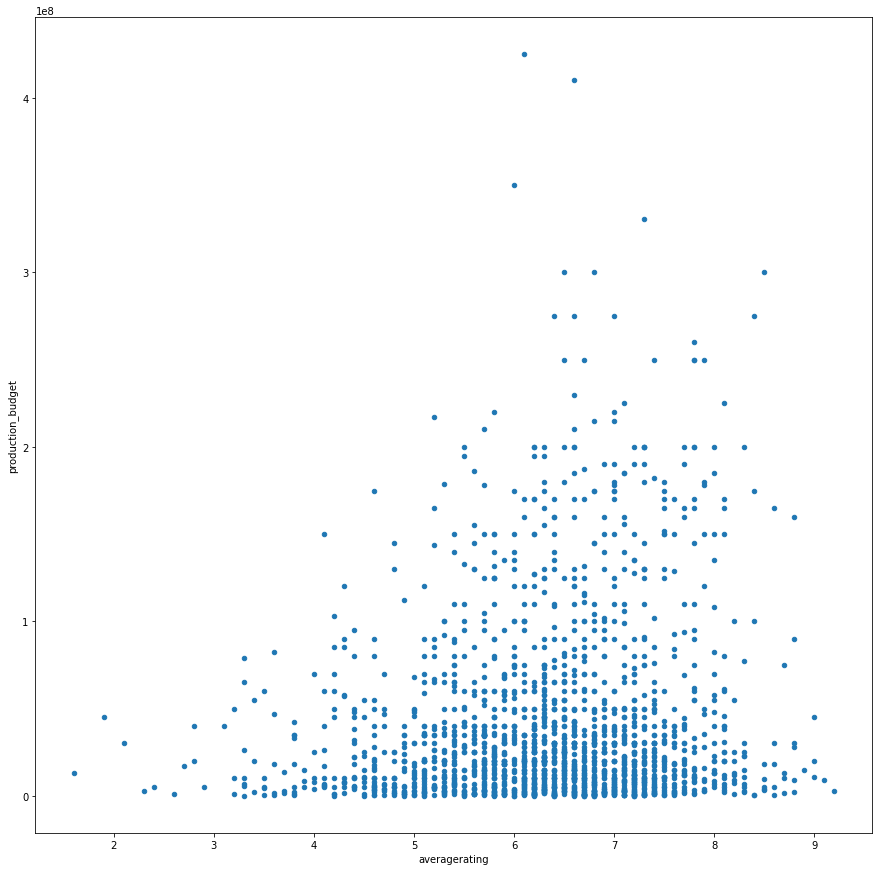

In [40]:
combineddf.plot.scatter(
x='averagerating',
y='production_budget',
figsize=(15,15));

### Basic plot of production budget vs Profit

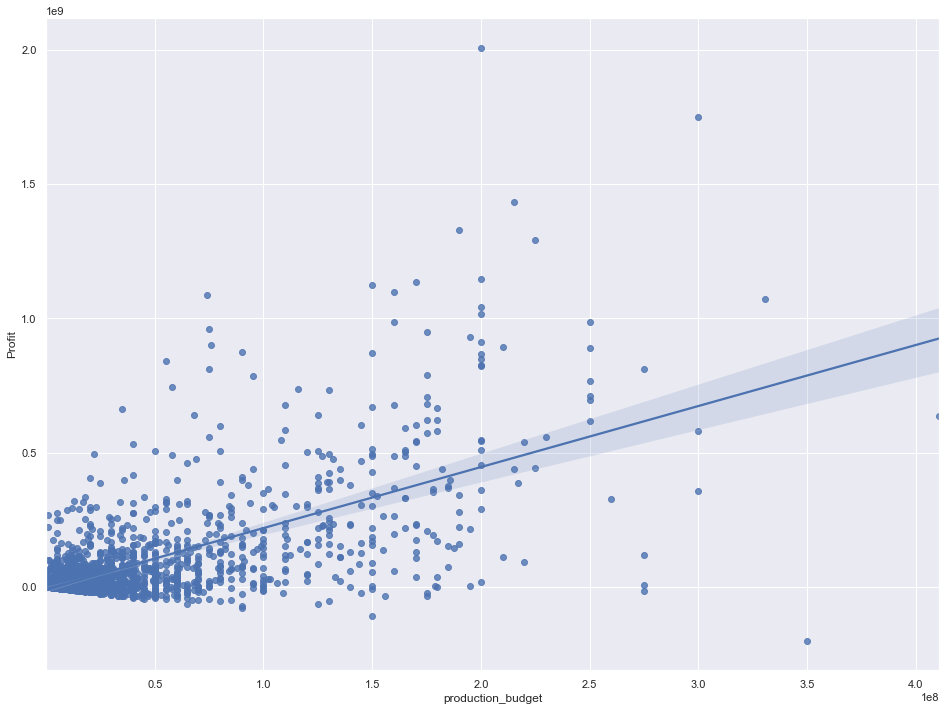

In [138]:
sns.set(rc={'figure.figsize':(16,12)})
sns.regplot(x=combineddf['production_budget'], y=combineddf['Profit']);

In [139]:
x = combineddf['production_budget']
y = combineddf['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1399.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.71e-230
Time:                        11:08:05   Log-Likelihood:                -38767.
No. Observations:                1923   AIC:                         7.754e+04
Df Residuals:                    1921   BIC:                         7.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.394e+06   3.99e+06     -2.104      0.035   -1.62e+07   -5.71e+05
production_budget     2.2725      0.061     37.402      0.000       2.153       2.392
==============================================================================
Omnibus:                     1214.731   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36644.121
Skew:                           2.470   Prob(JB):                         0.00
Kurtosis:                      23.807   Cond. No.                     8.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
combineddf.head()

,primary_title,averagerating,numvotes,genres,release_date,production_budget,domestic_gross,worldwide_gross,Profit,action,adventure,comedy,drama,romance,horror,fantasy
0,Foodfight!,1.9,8248,"Action,Animation,Comedy","Dec 31, 2012",45000000.0,$0,73706.0,-44926294.0,True,False,True,False,False,False,False
1,The Overnight,7.5,24,None,"Jun 19, 2015",200000.0,"$1,109,808",1165996.0,965996.0,False,False,False,False,False,False,False
3,On the Road,6.1,37886,"Adventure,Drama,Romance","Mar 22, 2013",25000000.0,"$720,828",9313302.0,-15686698.0,False,True,False,True,True,False,False
6,The Secret Life of Walter Mitty,7.3,275300,"Adventure,Comedy,Drama","Dec 25, 2013",91000000.0,"$58,236,838",187861183.0,96861183.0,False,True,True,True,False,False,False
7,A Walk Among the Tombstones,6.5,105116,"Action,Crime,Drama","Sep 19, 2014",28000000.0,"$26,017,685",62108587.0,34108587.0,True,False,False,True,False,False,False


### Adding Action, Adventure, Comedy, Drama, Horror, Romance, Fantasy, Thriller columns to deal with multiple genres

In [273]:
combineddf['action'] = False
combineddf['adventure'] = False
combineddf['comedy'] = False
combineddf['drama'] = False
combineddf['romance'] = False
combineddf['horror'] = False
combineddf['fantasy'] = False

In [274]:
combineddf = combineddf.copy()

In [275]:
combineddf.loc[combineddf['genres'].str.contains('Action', na=False), "action"] = True
combineddf.loc[combineddf['genres'].str.contains('Adventure', na=False), "adventure"] = True
combineddf.loc[combineddf['genres'].str.contains('Comedy', na=False), "comedy"] = True
combineddf.loc[combineddf['genres'].str.contains('Drama', na=False), "drama"] = True
combineddf.loc[combineddf['genres'].str.contains('Romance', na=False), "romance"] = True
combineddf.loc[combineddf['genres'].str.contains('Horror', na=False), "horror"] = True
combineddf.loc[combineddf['genres'].str.contains('Fantasy', na=False), "fantasy"] = True

### Removing avatar from combined database because incorrectly labeled as a Japanese Horror Film

In [276]:
combineddf.loc[combineddf['primary_title'] == 'Avatar']
combineddf.drop(index=1279, inplace=True)

KeyError: '[1279] not found in axis'

### Making new dataframes of each genre of film

In [277]:
actionmovies = combineddf.where(combineddf['action'] == True)
adventuremovies = combineddf.where(combineddf['adventure'] == True)
comedymovies = combineddf.where(combineddf['comedy'] == True)
dramamovies = combineddf.where(combineddf['drama'] == True)
romancemovies = combineddf.where(combineddf['romance'] == True)
horrormovies = combineddf.where(combineddf['horror'] == True)
fantasymovies = combineddf.where(combineddf['fantasy'] == True)

### Linear Regression Plot for the 6 genres

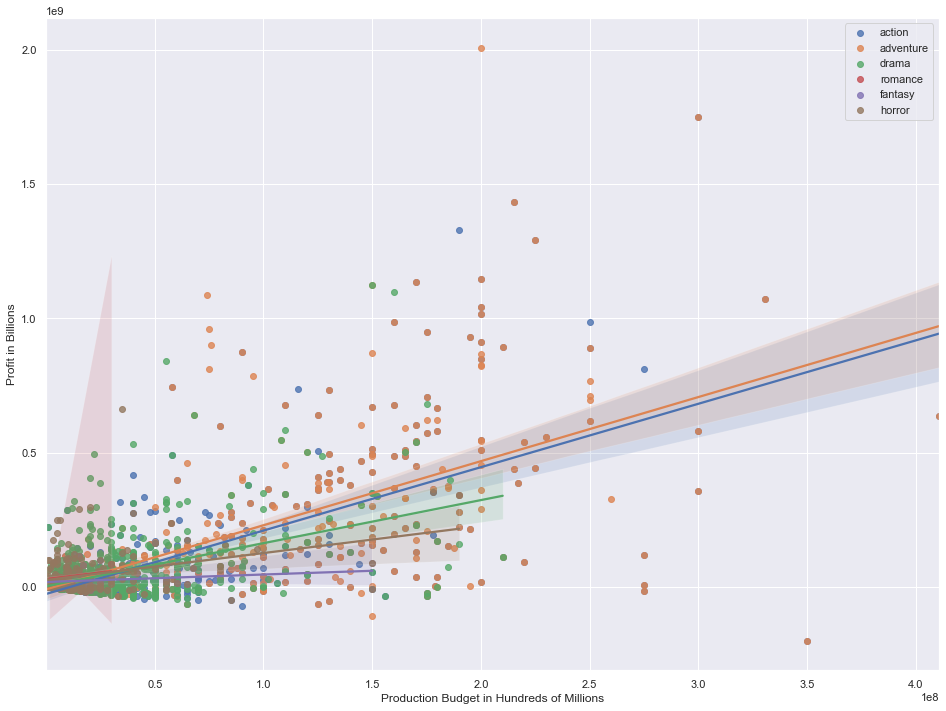

In [278]:
sns.regplot(x=actionmovies['production_budget'], y=actionmovies['Profit'], label = 'action')
sns.regplot(x=adventuremovies['production_budget'], y=adventuremovies['Profit'], label = 'adventure')
sns.regplot(x=dramamovies['production_budget'], y=dramamovies['Profit'], label = 'drama')
sns.regplot(x=romancemovies['production_budget'], y=horrormovies['Profit'], label = 'romance')
sns.regplot(x=fantasymovies['production_budget'], y=horrormovies['Profit'], label = 'fantasy')
sns.regplot(x=horrormovies['production_budget'], y=horrormovies['Profit'], label = 'horror')
plt.legend()
plt.ylabel("Profit in Billions")
plt.xlabel("Production Budget in Hundreds of Millions");

### This chart is very crowded in the bottom left and because our movie studio wants to start with low budget films, will plot only movies with a budget of less than 10 million dollars

In [177]:
lowbudgethorror = horrormovies.loc[(horrormovies['production_budget'] <= 10000000)]
lowbudgetaction = actionmovies.loc[(actionmovies['production_budget'] <= 10000000)]
lowbudgetadventure = adventuremovies.loc[(adventuremovies['production_budget'] <= 10000000)]
lowbudgetromance = romancemovies.loc[(romancemovies['production_budget'] <= 10000000)]
lowbudgetcomedy = comedymovies.loc[(comedymovies['production_budget'] <= 10000000)]
lowbudgetdrama = dramamovies.loc[(dramamovies['production_budget'] <= 10000000)]
lowbudgetfantasy = fantasymovies.loc[(fantasymovies['production_budget'] <= 10000000)]

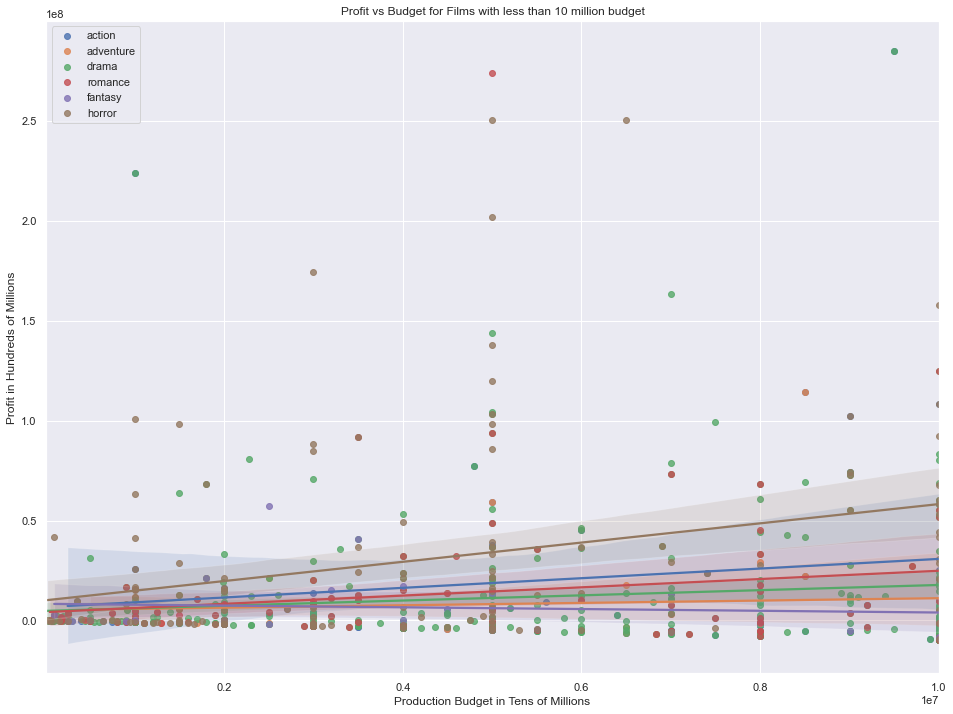

In [179]:
sns.regplot(x=lowbudgetaction['production_budget'], y=lowbudgetaction['Profit'], label = 'action')
sns.regplot(x=lowbudgetadventure['production_budget'], y=lowbudgetadventure['Profit'], label = 'adventure')
sns.regplot(x=lowbudgetdrama['production_budget'], y=lowbudgetdrama['Profit'], label = 'drama')
sns.regplot(x=lowbudgetromance['production_budget'], y=lowbudgetromance['Profit'], label = 'romance')
sns.regplot(x=lowbudgetfantasy['production_budget'], y=lowbudgetfantasy['Profit'], label = 'fantasy')
sns.regplot(x=lowbudgethorror['production_budget'], y=lowbudgethorror['Profit'], label = 'horror')
plt.legend()
plt.ylabel("Profit in Hundreds of Millions")
plt.xlabel("Production Budget in Tens of Millions")
plt.title("Profit vs Budget for Films with less than 10 million budget");

### This plot shows low budget horror movies appear to have the strongest correlation between profit and money spent. Displaying the stats models for each genre below.

In [180]:
x = lowbudgetaction['production_budget']
y = lowbudgetaction['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.617
Date:                Wed, 25 Oct 2023   Prob (F-statistic):              0.208
Time:                        11:21:51   Log-Likelihood:                -1244.8
No. Observations:                  65   AIC:                             2494.
Df Residuals:                      63   BIC:                             2498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.671e+06   1.19e+07      0.562      0.576   -1.71e+07    3.04e+07
production_budget     2.4140      1.898      1.272      0.208      -1.379       6.207
==============================================================================
Omnibus:                       73.829   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.796
Skew:                           3.390   Prob(JB):                    9.28e-126
Kurtosis:                      15.909   Cond. No.                     1.18e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
x = lowbudgetadventure['production_budget']
y = lowbudgetadventure['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.2549
Date:                Wed, 25 Oct 2023   Prob (F-statistic):              0.617
Time:                        11:22:40   Log-Likelihood:                -697.16
No. Observations:                  38   AIC:                             1398.
Df Residuals:                      36   BIC:                             1402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               5.24e+06    6.9e+06      0.760      0.452   -8.75e+06    1.92e+07
production_budget     0.5924      1.173      0.505      0.617      -1.788       2.972
==============================================================================
Omnibus:                       47.037   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.459
Skew:                           2.889   Prob(JB):                     1.99e-46
Kurtosis:                      12.977   Cond. No.                     1.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
x = lowbudgetdrama['production_budget']
y = lowbudgetdrama['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.256
Date:                Wed, 25 Oct 2023   Prob (F-statistic):            0.00429
Time:                        11:23:16   Log-Likelihood:                -7186.0
No. Observations:                 386   AIC:                         1.438e+04
Df Residuals:                     384   BIC:                         1.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.789e+06   2.65e+06      1.809      0.071   -4.16e+05    9.99e+06
production_budget     1.2980      0.452      2.873      0.004       0.410       2.186
==============================================================================
Omnibus:                      384.190   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13411.337
Skew:                           4.312   Prob(JB):                         0.00
Kurtosis:                      30.559   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
x = lowbudgetromance['production_budget']
y = lowbudgetromance['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.231
Date:                Wed, 25 Oct 2023   Prob (F-statistic):             0.0756
Time:                        11:23:53   Log-Likelihood:                -1766.7
No. Observations:                  94   AIC:                             3537.
Df Residuals:                      92   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.181e+06   6.26e+06      0.668      0.506   -8.25e+06    1.66e+07
production_budget     2.0688      1.151      1.797      0.076      -0.217       4.355
==============================================================================
Omnibus:                      130.558   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3866.686
Skew:                           4.767   Prob(JB):                         0.00
Kurtosis:                      32.939   Cond. No.                     9.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
x = lowbudgetfantasy['production_budget']
y = lowbudgetfantasy['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.1302
Date:                Wed, 25 Oct 2023   Prob (F-statistic):              0.722
Time:                        11:24:20   Log-Likelihood:                -431.41
No. Observations:                  24   AIC:                             866.8
Df Residuals:                      22   BIC:                             869.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.327e+06   5.23e+06      1.593      0.125   -2.51e+06    1.92e+07
production_budget    -0.4341      1.203     -0.361      0.722      -2.929       2.061
==============================================================================
Omnibus:                       18.801   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.273
Skew:                           1.845   Prob(JB):                     2.40e-05
Kurtosis:                       5.766   Cond. No.                     6.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
x = lowbudgethorror['production_budget']
y = lowbudgethorror['Profit']
x = x.dropna()
y = y.dropna()
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     12.00
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           0.000728
Time:                        11:25:06   Log-Likelihood:                -2423.7
No. Observations:                 127   AIC:                             4851.
Df Residuals:                     125   BIC:                             4857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.009e+07   7.17e+06      1.407      0.162   -4.11e+06    2.43e+07
production_budget     4.8152      1.390      3.465      0.001       2.065       7.566
==============================================================================
Omnibus:                       80.466   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.720
Skew:                           2.360   Prob(JB):                     4.22e-77
Kurtosis:                       9.647   Cond. No.                     8.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We clearly see the r^2 value for low budget horror movies is the highest among genres with the highest correlation coefficient and lowest P-Value. 

### At this point we are going to recommend our studio invest in low budget horror movies as each dollar spent has the best correlation to profit among different genres.

### Running another SQL query to attach directors to our dataset to find the best horror directors to hire.

In [186]:
q30 = """
SELECT mb.primary_title, pe.primary_name, pr.category 
FROM movie_basics AS mb
JOIN principals AS pr
ON mb.movie_id = pr.movie_id
JOIN persons as pe
ON pr.person_id = pe.person_id
WHERE mb.genres LIKE '%Horror%' AND category == "director"
;
"""
pd.read_sql(q30, conn)

,primary_title,primary_name,category
0,The Wicker Tree,Robin Hardy,director
1,"Kajeng Kliwon, Nightmare in Bali",Bambang Drias,director
2,Unholy Attraction,Alexander T. Hwang,director
3,Kuwaresma,Erik Matti,director
4,The Light From The Tower,Alex R. Wagner,director
...,...,...,...
11199,Suzzanna: Buried Alive,Rocky Soraya,director
11200,Suzzanna: Buried Alive,Anggy Umbara,director
11201,Two Eighteen,Marlon Beroit,director
11202,Clown vs. Vampires,Michael Worth,director


In [214]:
directorsdf = pd.read_sql(q30, conn)

In [215]:
directorbudgetsdf = directorsdf.merge(lowbudgethorror, how='inner', left_on='primary_title', right_on='primary_title')

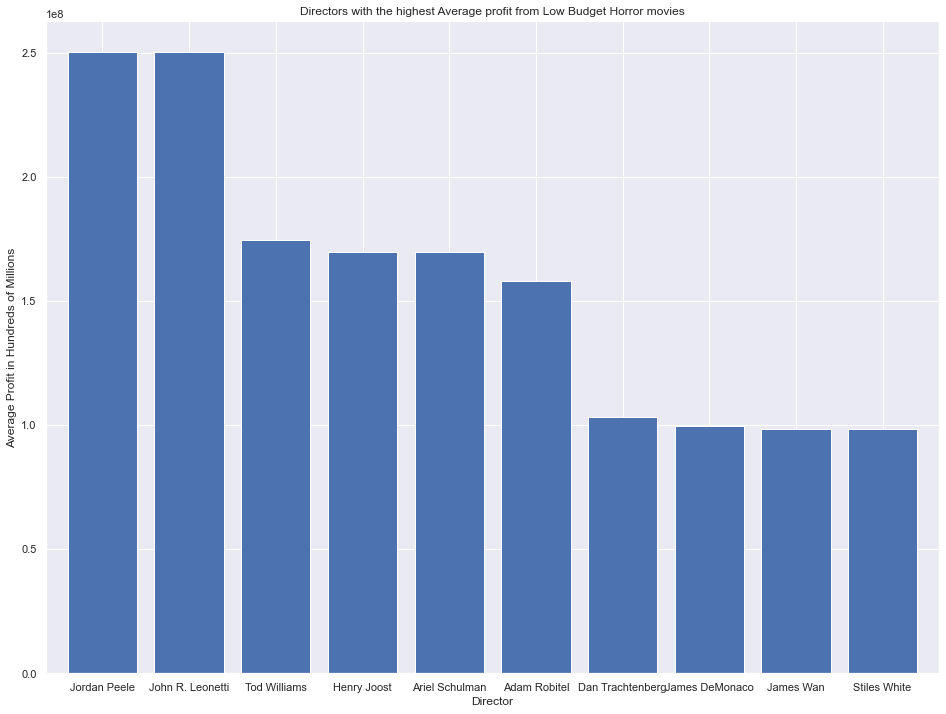

In [303]:
directorbudgetsdf.groupby('primary_name')['Profit'].mean().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                                                      title='Directors with the highest Average profit from Low Budget Horror movies',
                                                                                                      ylabel='Average Profit in Hundreds of Millions',
                                                                                                      xlabel='Director',
                                                                                                      width = .8
                                                                                                     );
plt.xticks(rotation=360);

### Hiring any of these 10 directors would offer a good return on investment from historical performance in low budget horror films.

In [217]:
directorbudgetsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      150 non-null    object 
 1   primary_name       150 non-null    object 
 2   category           150 non-null    object 
 3   averagerating      150 non-null    float64
 4   numvotes           150 non-null    float64
 5   genres             150 non-null    object 
 6   release_date       150 non-null    object 
 7   production_budget  150 non-null    float64
 8   domestic_gross     150 non-null    object 
 9   worldwide_gross    150 non-null    float64
 10  Profit             150 non-null    float64
 11  action             150 non-null    float64
 12  adventure          150 non-null    float64
 13  comedy             150 non-null    float64
 14  drama              150 non-null    float64
 15  romance            150 non-null    float64
 16  horror             150 non

### Comparing average rating for the movies that the top 10 horror directors made

In [218]:
top10directorsdf = directorbudgetsdf.loc[(directorbudgetsdf["primary_name"].isin(["Jordan Peele", "John R. Leonetti",
                                                                                 "Tod Williams", "Henry Joost",
                                                                                 "Ariel Schulman", "Adam Robitel",
                                                                                 "Dan Trachtenberg", "James Demonaco",
                                                                                 "James Wan", "Stiles White"]))]

In [280]:
top10directorsdf.head(25)

,primary_title,primary_name,category,averagerating,numvotes,genres,release_date,production_budget,domestic_gross,worldwide_gross,Profit,action,adventure,comedy,drama,romance,horror,fantasy
9,Paranormal Activity 4,Henry Joost,director,4.6,58408.0,"Horror,Mystery,Thriller","Oct 19, 2012",5000000.0,"$53,900,335",142817992.0,137817992.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10,Paranormal Activity 4,Ariel Schulman,director,4.6,58408.0,"Horror,Mystery,Thriller","Oct 19, 2012",5000000.0,"$53,900,335",142817992.0,137817992.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,Paranormal Activity 3,Henry Joost,director,5.8,85689.0,"Horror,Mystery,Thriller","Oct 21, 2011",5000000.0,"$104,028,807",207039844.0,202039844.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,Paranormal Activity 3,Ariel Schulman,director,5.8,85689.0,"Horror,Mystery,Thriller","Oct 21, 2011",5000000.0,"$104,028,807",207039844.0,202039844.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24,Ouija,Stiles White,director,4.5,44054.0,"Horror,Mystery,Thriller","Oct 24, 2014",5000000.0,"$50,856,010",103300632.0,98300632.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,10 Cloverfield Lane,Dan Trachtenberg,director,7.2,260383.0,"Drama,Horror,Mystery","Mar 11, 2016",5000000.0,"$72,082,999",108286422.0,103286422.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
68,Paranormal Activity 2,Tod Williams,director,5.7,93122.0,Horror,"Oct 20, 2010",3000000.0,"$84,752,907",177512032.0,174512032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,Insidious,James Wan,director,6.9,254197.0,"Horror,Mystery,Thriller","Apr 1, 2011",1500000.0,"$54,009,150",99870886.0,98370886.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90,Annabelle,John R. Leonetti,director,5.4,122039.0,"Horror,Mystery,Thriller","Oct 3, 2014",6500000.0,"$84,273,813",256862920.0,250362920.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136,Get Out,Jordan Peele,director,7.7,400474.0,"Horror,Mystery,Thriller","Feb 24, 2017",5000000.0,"$176,040,665",255367951.0,250367951.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


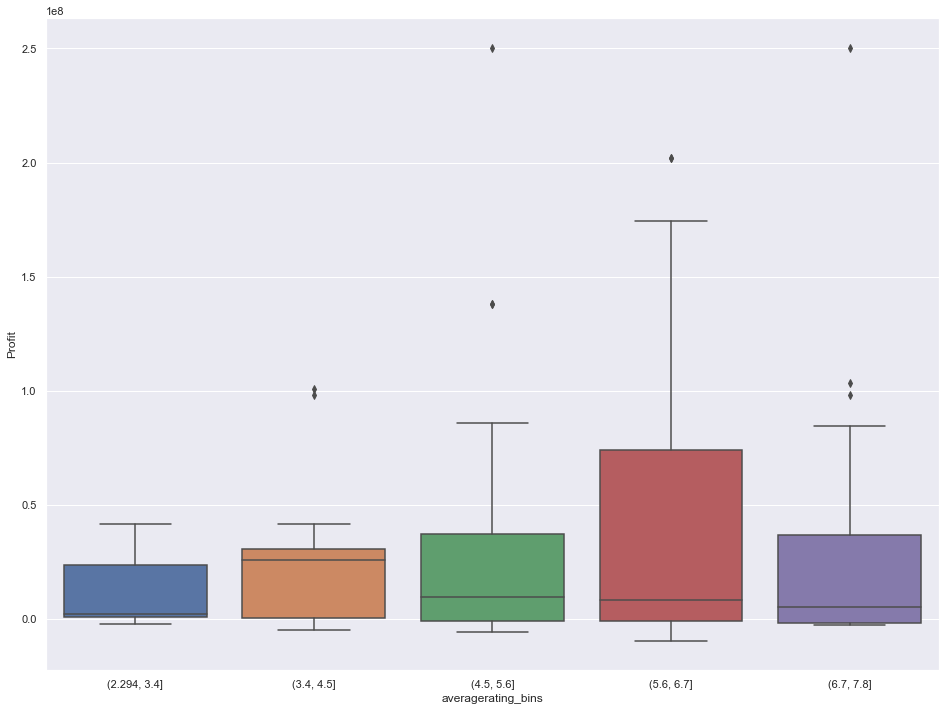

In [220]:
directorbudgetsdf['averagerating_bins'] = pd.cut(directorbudgetsdf['averagerating'], bins=5)
ax = sns.boxplot(data=directorbudgetsdf, x='averagerating_bins', y='Profit')

### Additional analysis comparing profit with average IMDB rating. Rating doesn't appear strongly correlated with profit. Continuing exploration.

### Converting release_date to datetime to compare average profit by month for low budget horror films to recommend release window for studio.

In [221]:
lowbudgethorror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 123 to 2859
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      127 non-null    object 
 1   averagerating      127 non-null    float64
 2   numvotes           127 non-null    float64
 3   genres             127 non-null    object 
 4   release_date       127 non-null    object 
 5   production_budget  127 non-null    float64
 6   domestic_gross     127 non-null    object 
 7   worldwide_gross    127 non-null    float64
 8   Profit             127 non-null    float64
 9   action             127 non-null    float64
 10  adventure          127 non-null    float64
 11  comedy             127 non-null    float64
 12  drama              127 non-null    float64
 13  romance            127 non-null    float64
 14  horror             127 non-null    float64
 15  fantasy            127 non-null    float64
dtypes: float64(12), object(

In [254]:
lowbudgethorror.head()
from datetime import datetime

In [255]:
lowbudgethorror['release_date'] = pd.to_datetime(lowbudgethorror['release_date'])

In [256]:
lowbudgethorror['month'] = lowbudgethorror['release_date'].dt.month

In [257]:
lowbudgethorror.head()

,primary_title,averagerating,numvotes,genres,release_date,production_budget,domestic_gross,worldwide_gross,Profit,action,adventure,comedy,drama,romance,horror,fantasy,month
123,Red State,6.2,59266.0,"Action,Crime,Horror",2011-09-23,4000000.0,"$1,065,429",1983596.0,-2016404.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9
235,The Belko Experiment,6.1,38378.0,"Horror,Thriller",2017-03-17,5000000.0,"$10,166,820",11792942.0,6792942.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
275,Circle,3.4,610.0,"Horror,Thriller",2010-08-27,2000000.0,"$10,024",10024.0,-1989976.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
304,10 Cloverfield Lane,7.2,260383.0,"Drama,Horror,Mystery",2016-03-11,5000000.0,"$72,082,999",108286422.0,103286422.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
323,Ouija,4.5,44054.0,"Horror,Mystery,Thriller",2014-10-24,5000000.0,"$50,856,010",103300632.0,98300632.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10


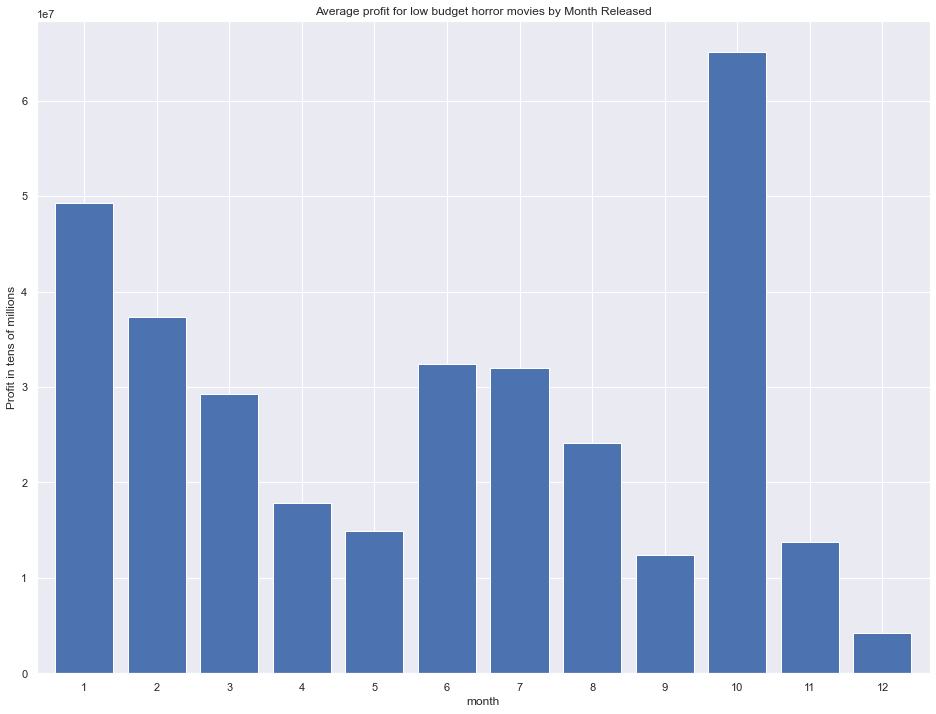

In [306]:
lowbudgethorror.groupby('month')['Profit'].mean().plot(kind='bar', 
                                                       title="Average profit for low budget horror movies by Month Released",
                                                       ylabel="Profit in tens of millions",
                                                       width=.8
                                                      );
plt.xticks(rotation=360);

### Recommend releasing film in October because on average low budget horror films released then make the most profit.